<h3 align="center">Data Analytics</h3> 
<h3 align="center">Course Assignment N.07: New Channels</h3> 
<h3 align="center">Academic Year 2023</h3> 

**Done by:**
Yusuke Sugihara,
Maria Camila Millan

### import libraries

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pprint
import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.datasets import fetch_20newsgroups

from collections import Counter # Visualizing class Distribution
import matplotlib.cm as cm # color map


# perform more Pre-processing steps
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from pprint import pprint


from gensim.models import word2vec
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from itertools import cycle
import time
from gensim.models import word2vec

In [57]:
from pprint import pprint
print(os.getcwd())
print(os.listdir())
path_dataset = "/Users/yusuke_sugihara/DA_Project/07_news_Channels/"
# print(os.listdir(path_dataset))


/Users/yusuke_sugihara/DA_Project/DA_Project2
['.DS_Store', '01_data_description.ipynb', 'README.md', '.git']


**NOTE**: Since our dataset is exactly the same as https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset, we will use the  [```The sklearn.datasets.fetch_20newsgroups function```](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) so that we can efficiently analyze the dataset.




## 1. Preprocessing - Data Cleaning 

We can see that there is unnecessary information such as header and footer quotes in the raw dataset below.(e.g. header, footer, quotes)

In [58]:
raw_dataset = fetch_20newsgroups(data_home = path_dataset, subset='all', shuffle=False)
print(raw_dataset.data[1])

From: gnelson@pion.rutgers.edu (Gregory Nelson)
Subject: Thanks Apple: Free Ethernet on my C610!
Article-I.D.: pion.Apr.6.12.05.34.1993.11732
Organization: Rutgers Univ., New Brunswick, N.J.
Lines: 26


	Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wouldn't come up!
	The hard drive also has an annoying high pitch

####  Therefore, I will remove those unneccesary information with one parameter called "remove" in the ``sklearn.datasets.fetch_20newsgroups¶``

### All dataset

In [59]:
# Remove the headers, footers, and quotes from the documents.
all_dataset = fetch_20newsgroups(
    data_home=path_dataset,
    remove=("headers", "footers", "quotes"), 
    subset="all",
    shuffle=True,
    random_state=42,
)

labels = all_dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(all_dataset.data)} documents - {true_k} categories")


18846 documents - 20 categories


### Train dataset

In [60]:
# Remove the headers, footers, and quotes from the documents.
train_dataset = fetch_20newsgroups(
    data_home=path_dataset,
    remove=("headers", "footers", "quotes"), 
    subset="train",
    shuffle=True,
    random_state=42,
)

labels = train_dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(train_dataset.data)} documents - {true_k} categories")

11314 documents - 20 categories


### Test Dataset

In [61]:
# Remove the headers, footers, and quotes from the documents.
test_dataset = fetch_20newsgroups(
    data_home=path_dataset,
    remove=("headers", "footers", "quotes"), 
    subset="test",
    shuffle=True,
    random_state=42,
)

labels = test_dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(test_dataset.data)} documents - {true_k} categories")

7532 documents - 20 categories


#### Check if we can remove those unnecessary information from each document.

In [62]:
for i in range(2):
    doc = all_dataset.data[i]
    category = all_dataset.target_names[all_dataset.target[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.hockey: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!



The 2-th sent of comp.sys.ibm.pc.hardware: My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

#### Now those unnecesarry information were actually eliminated from the origina doc

### Check all categories for both train dataset and test one
I can see there are 20 categories in total in the dataset.

In [63]:
pprint(list(train_dataset.target_names))
pprint(len(train_dataset.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
20


In [64]:
pprint(list(test_dataset.target_names))
pprint(len(test_dataset.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
20


#### Now we were able to make sure if both train dataset and test dataset have the same categories, which 20 categories in total.

The real data lies in the filenames and target attributes. The target attribute is the integer index of the category:

In [65]:
print(all_dataset.filenames[:3]) # file names
print(f'labels: {all_dataset.target[:3]}') # # labels for clustering evaluation 
print(all_dataset.data[:3]) # data  

['/Users/yusuke_sugihara/DA_Project/07_news_Channels/20news_home/20news-bydate-test/rec.sport.hockey/54367'
 '/Users/yusuke_sugihara/DA_Project/07_news_Channels/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60215'
 '/Users/yusuke_sugihara/DA_Project/07_news_Channels/20news_home/20news-bydate-train/talk.politics.mideast/76120']
labels: [10  3 17]
["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed no

### Check how many documents there are in the all dataset.

In [66]:
print(len(all_dataset.data), len(all_dataset.target)) 
print(type(all_dataset.data), type(all_dataset.target))
# print(all_dataset.target_names)

18846 18846
<class 'list'> <class 'numpy.ndarray'>


In [67]:
print(len(train_dataset.data), len(train_dataset.target)) 
print(type(train_dataset.data), type(train_dataset.target))
# print(train_dataset.target_names)

11314 11314
<class 'list'> <class 'numpy.ndarray'>


In [68]:
print(len(test_dataset.data), len(test_dataset.target)) 
print(type(test_dataset.data), type(test_dataset.target))
# print(test_dataset.target_names)

7532 7532
<class 'list'> <class 'numpy.ndarray'>


### Distribution of the number of docoments for each category

#### Train dataset

(7, 4, 1, 14, 16, 13, 3, 2, 8, 19, 6, 0, 12, 5, 10, 9, 15, 17, 18, 11)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
(594, 578, 584, 593, 546, 594, 590, 591, 598, 377, 585, 480, 591, 593, 600, 597, 599, 564, 465, 595)


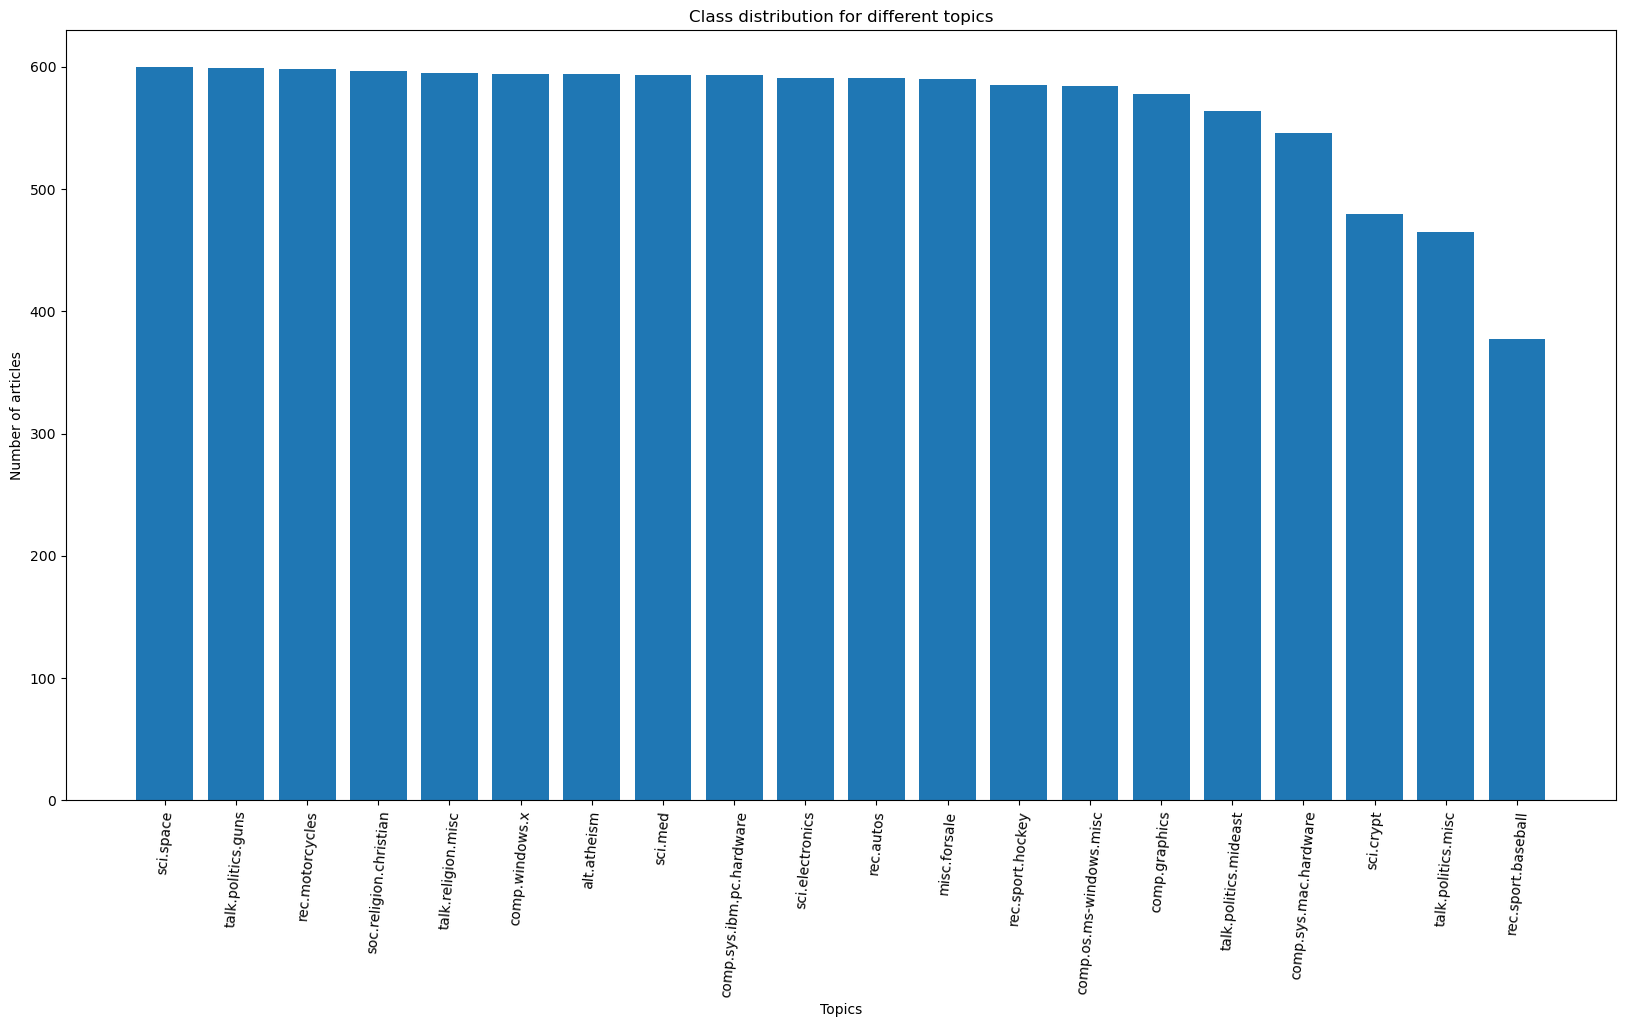

In [69]:
label_20, values = zip(*Counter(train_dataset.target).items())
print(label_20)
print(train_dataset.target_names)
print(values)

indexes = np.argsort(values)[::-1]
label_20 = np.array(train_dataset.target_names)[indexes]
val = np.array(values)[indexes]

plt.figure(figsize=(20, 10))
plt.bar(label_20, val)
plt.xticks(rotation=85)
plt.xlabel('Topics')
plt.ylabel('Number of articles')
plt.title('Class distribution for different topics')
plt.show()


(7, 5, 0, 17, 19, 13, 15, 1, 2, 8, 4, 6, 16, 14, 3, 11, 9, 10, 18, 12)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
(396, 395, 319, 376, 251, 396, 398, 389, 394, 398, 385, 390, 364, 394, 392, 396, 397, 399, 310, 393)


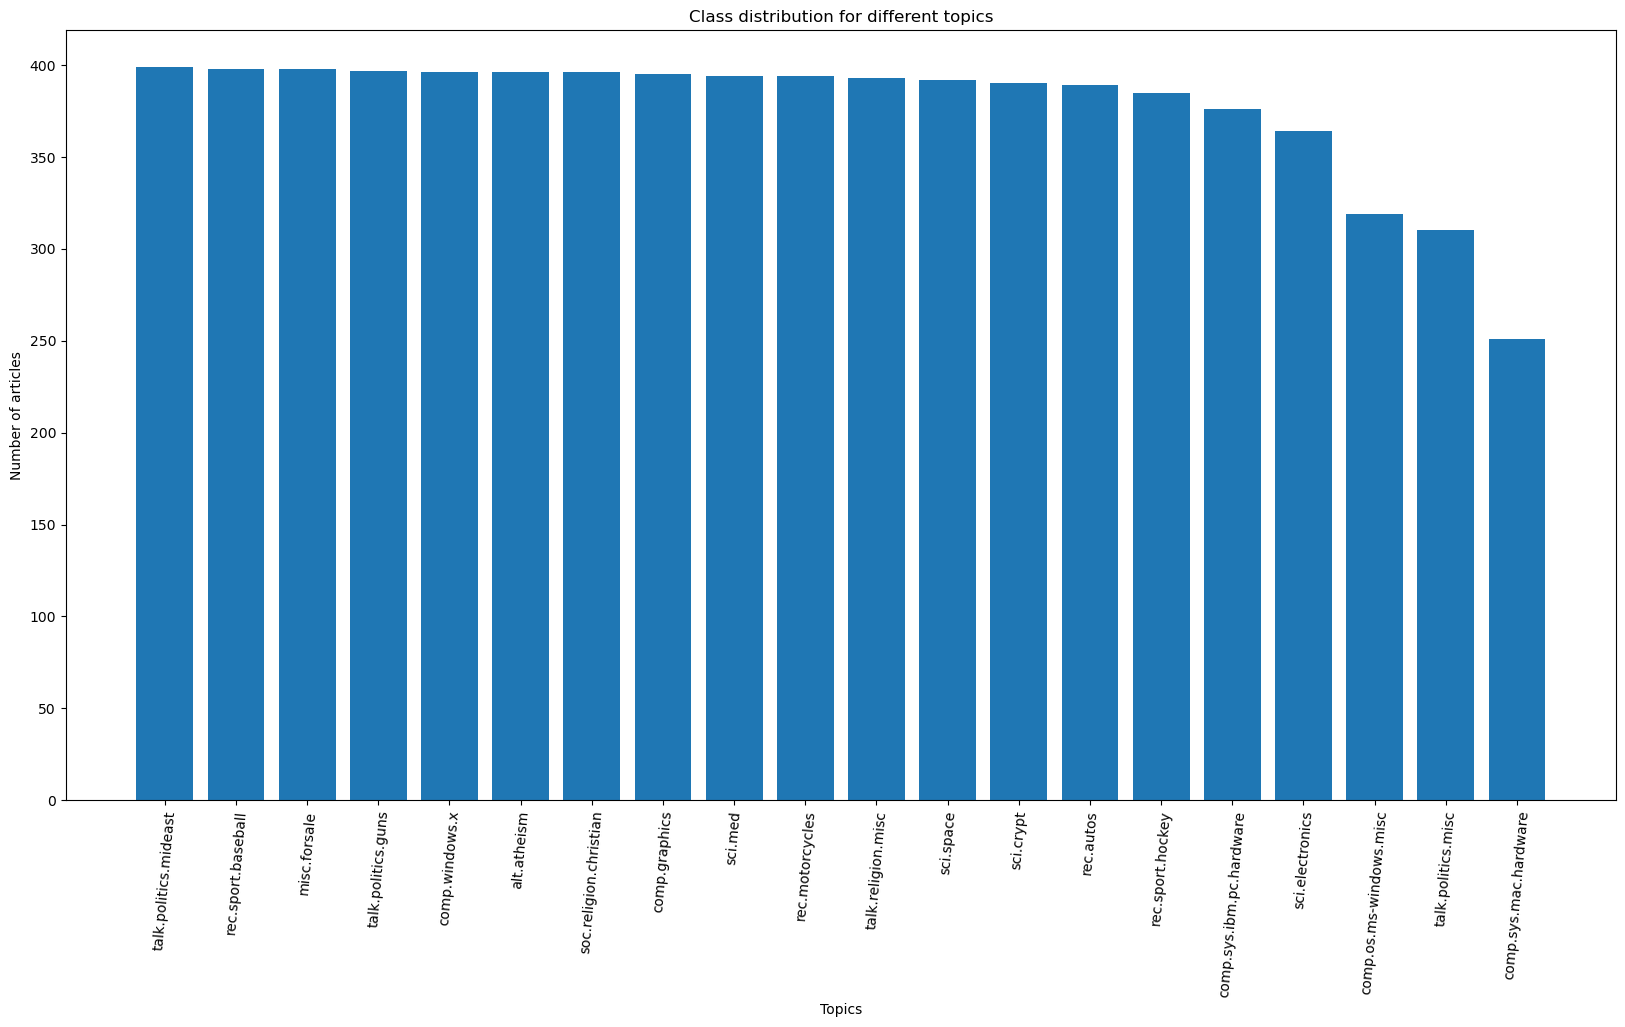

In [70]:
label_20, values = zip(*Counter(test_dataset.target).items())
print(label_20)
print(test_dataset.target_names)
print(values)

indexes = np.argsort(values)[::-1]
label_20 = np.array(test_dataset.target_names)[indexes]
val = np.array(values)[indexes]

plt.figure(figsize=(20, 10))
plt.bar(label_20, val)
plt.xticks(rotation=85)
plt.xlabel('Topics')
plt.ylabel('Number of articles')
plt.title('Class distribution for different topics')
plt.show()

## 2. Tokenization

In [71]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(all_dataset.data)
print(f'(vectors_shape:{vectors.shape}')

(vectors_shape:(18846, 134410)


In [72]:
def pre_processing(docs):
    stopwords = set(STOPWORDS)
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+") # remove punctuations
    # en_stop = stopwords('en') # 
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in stopwords]
        # remove digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        # you could always add some new preprocessing here
        yield doc

In [73]:
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(all_dataset.data))

In [74]:
# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])
print(Vocab_v1[1])

18846
['sure', 'bashers', 'pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent', 'pens', 'massacre', 'devils', 'actually', 'bit', 'puzzled', 'bit', 'relieved', 'going', 'put', 'end', 'non-pittsburghers', 'relief', 'bit', 'praise', 'pens', 'man', 'killing', 'devils', 'worse', 'thought', 'jagr', 'showed', 'much', 'better', 'regular', 'season', 'stats', 'lot', 'fo', 'fun', 'watch', 'playoffs', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'games', 'pens', 'going', 'beat', 'pulp', 'jersey', 'anyway', 'disappointed', 'see', 'islanders', 'lose', 'final', 'regular', 'season', 'game', 'pens', 'rule']
['brother', 'market', 'high-performance', 'video', 'card', 'supports', 'vesa', 'local', 'bus', '1-2mb', 'ram', 'anyone', 'suggestions', 'ideas', 'diamond', 'stealth', 'pro', 'local', 'bus', 'orchid', 'farenheit', '1280', 'ati', 'graphics', 'ultra', 'pro', 'high-performance', 'vlb', 'card', 'please', 'post', 'email', 'thank', 'matt']


In [76]:
# train the Word2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
# Dimensionality of the hidden layer representation
num_features = 100
# Minimum word count to keep a word in the vocabulary    
min_word_count = 20
# Context window size (on each side)
context = 5
# Downsample setting for frequent words                                                             
downsampling = 1e-3  

# Initialize and train the model. 
print("Training model...");
w2v_model = word2vec.Word2Vec(Vocab_v1, size=num_features, min_count = min_word_count, window = context, sample = downsampling)
# calling init_sims to make the model more memory efficient by normalizing the vectors in-place.
w2v_model.init_sims(replace=True);
# Save the model
model_name = "model_full_20newsGroup";
w2v_model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

Training model...


TypeError: Word2Vec.__init__() got an unexpected keyword argument 'size'

In [5]:
from collections import defaultdict
from sklearn import metrics
from time import time

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_train, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_train, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_train, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_train, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(dataset_train.data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.234 s
n_samples: 2034, n_features: 7831


In [7]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.012


In [8]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements asigned to each cluster: [114 470 789 661]
Number of elements asigned to each cluster: [463 746 114 711]
Number of elements asigned to each cluster: [ 58 764 726 486]
Number of elements asigned to each cluster: [368 109 841 716]
Number of elements asigned to each cluster: [113 396 815 710]

True number of documents in each category according to the class labels: [480 584 593 377]


In [9]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 0.10 ± 0.01 s 
Homogeneity: 0.541 ± 0.073
Completeness: 0.615 ± 0.068
V-measure: 0.576 ± 0.071
Adjusted Rand-Index: 0.515 ± 0.100
Silhouette Coefficient: 0.010 ± 0.000


In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")


LSA done in 0.326 s
Explained variance of the SVD step: 29.2%


In [11]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.01 ± 0.00 s 
Homogeneity: 0.579 ± 0.102
Completeness: 0.642 ± 0.075
V-measure: 0.606 ± 0.087
Adjusted Rand-Index: 0.550 ± 0.129
Silhouette Coefficient: 0.040 ± 0.002


In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(
    n_clusters=true_k,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",
)

clustering done in 0.03 ± 0.01 s 
Homogeneity: 0.551 ± 0.051
Completeness: 0.596 ± 0.052
V-measure: 0.573 ± 0.050
Adjusted Rand-Index: 0.517 ± 0.088
Silhouette Coefficient: 0.037 ± 0.003


In [13]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: god com people jesus don sandvik article bible think christian 
Cluster 1: keith caltech objective morality sgi livesey solntze wpd jon schneider 
Cluster 2: graphics university thanks com files image posting host nntp help 
Cluster 3: space nasa access com henry gov digex alaska moon pat 


In [14]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

lsa_vectorizer = make_pipeline(
    HashingVectorizer(stop_words="english", n_features=50_000),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=0),
    Normalizer(copy=False),
)

t0 = time()
X_hashed_lsa = lsa_vectorizer.fit_transform(dataset_train.data)
print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 1.279 s


In [15]:
fit_and_evaluate(kmeans, X_hashed_lsa, name="KMeans\nwith LSA on hashed vectors")

clustering done in 0.01 ± 0.00 s 
Homogeneity: 0.572 ± 0.069
Completeness: 0.592 ± 0.093
V-measure: 0.582 ± 0.080
Adjusted Rand-Index: 0.531 ± 0.114
Silhouette Coefficient: 0.039 ± 0.002


In [16]:
fit_and_evaluate(
    minibatch_kmeans,
    X_hashed_lsa,
    name="MiniBatchKMeans\nwith LSA on hashed vectors",
)

clustering done in 0.03 ± 0.00 s 
Homogeneity: 0.549 ± 0.072
Completeness: 0.579 ± 0.080
V-measure: 0.563 ± 0.075
Adjusted Rand-Index: 0.521 ± 0.096
Silhouette Coefficient: 0.037 ± 0.003


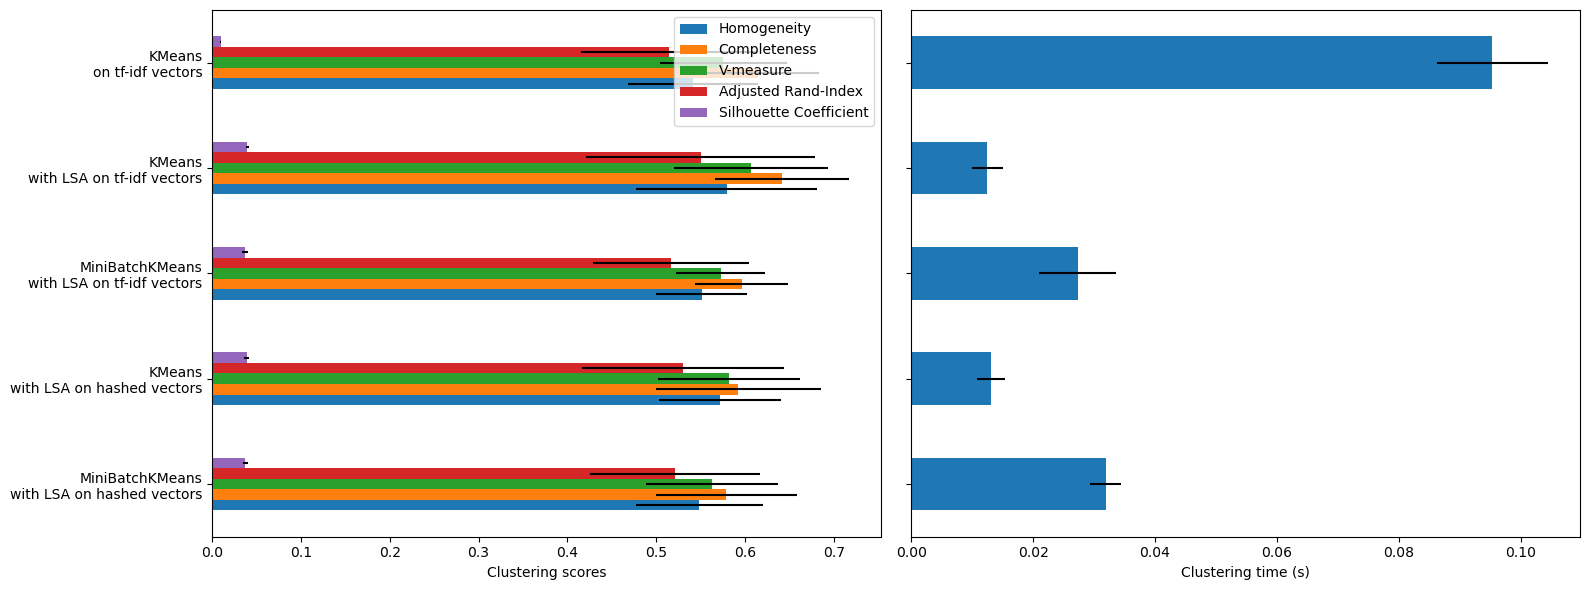

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()